 # Crypto Market Analysis + Prediction using VAR
 A cryptocurrency, crypto-currency, or crypto is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. It typically does not exist in physical form (like paper money) and is typically not issued by a central authority. Cryptocurrencies typically use decentralized control as opposed to centralized digital currency and central banking systems When a cryptocurrency is minted or created prior to issuance or issued by a single issuer, it is generally considered centralized. When implemented with decentralized control, each cryptocurrency works through distributed ledger technology, typically a blockchain, that serves as a public financial transaction database. -[Wikipedia](https://en.wikipedia.org/wiki/Cryptocurrency)

**In this notebook, I will be analysing and predicting price for Polygon Matic cryptocurrency.**

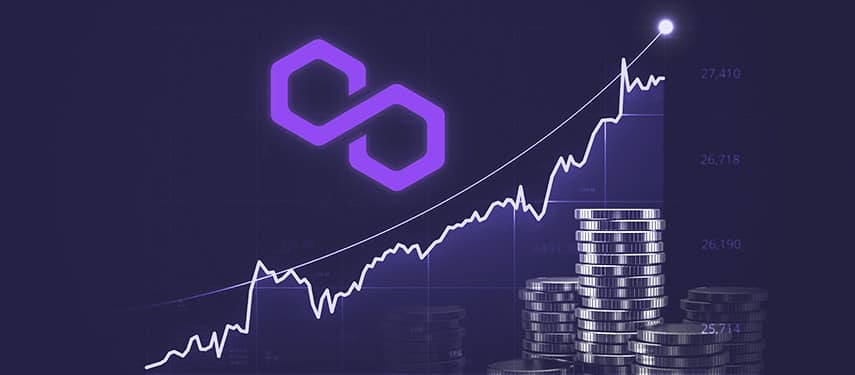

Polygon is a protocol and a framework for building and connecting Ethereum-compatible blockchain networks. Aggregating scalable solutions on Ethereum supporting a multi-chain Ethereum ecosystem.

**Built by developers, for developers**

Polygon combines the best of Ethereum and sovereign blockchains into a full-fledged multi-chain system.

Polygon solves pain points associated with Blockchains, like high gas fees and slow speeds, without sacrificing on security. This multi-chain system is akin to other ones such as Polkadot, Cosmos, Avalanche etc, but with at least three major upsides:
- It is able to fully benefit from Ethereum’s network effects
- It is inherently more secure
- It is more open and powerful

**Polygon - a protocol and a framework for building and connecting Ethereum-compatible blockchain networks.**

- One-click deployment of preset blockchain networks
- Growing set of modules for developing custom networks
- Interoperability protocol for exchanging arbitrary messages with Ethereum and other blockchain networks
- Modular and optional “security as a service”
- Adaptor modules for enabling interoperability for existing blockchain networks

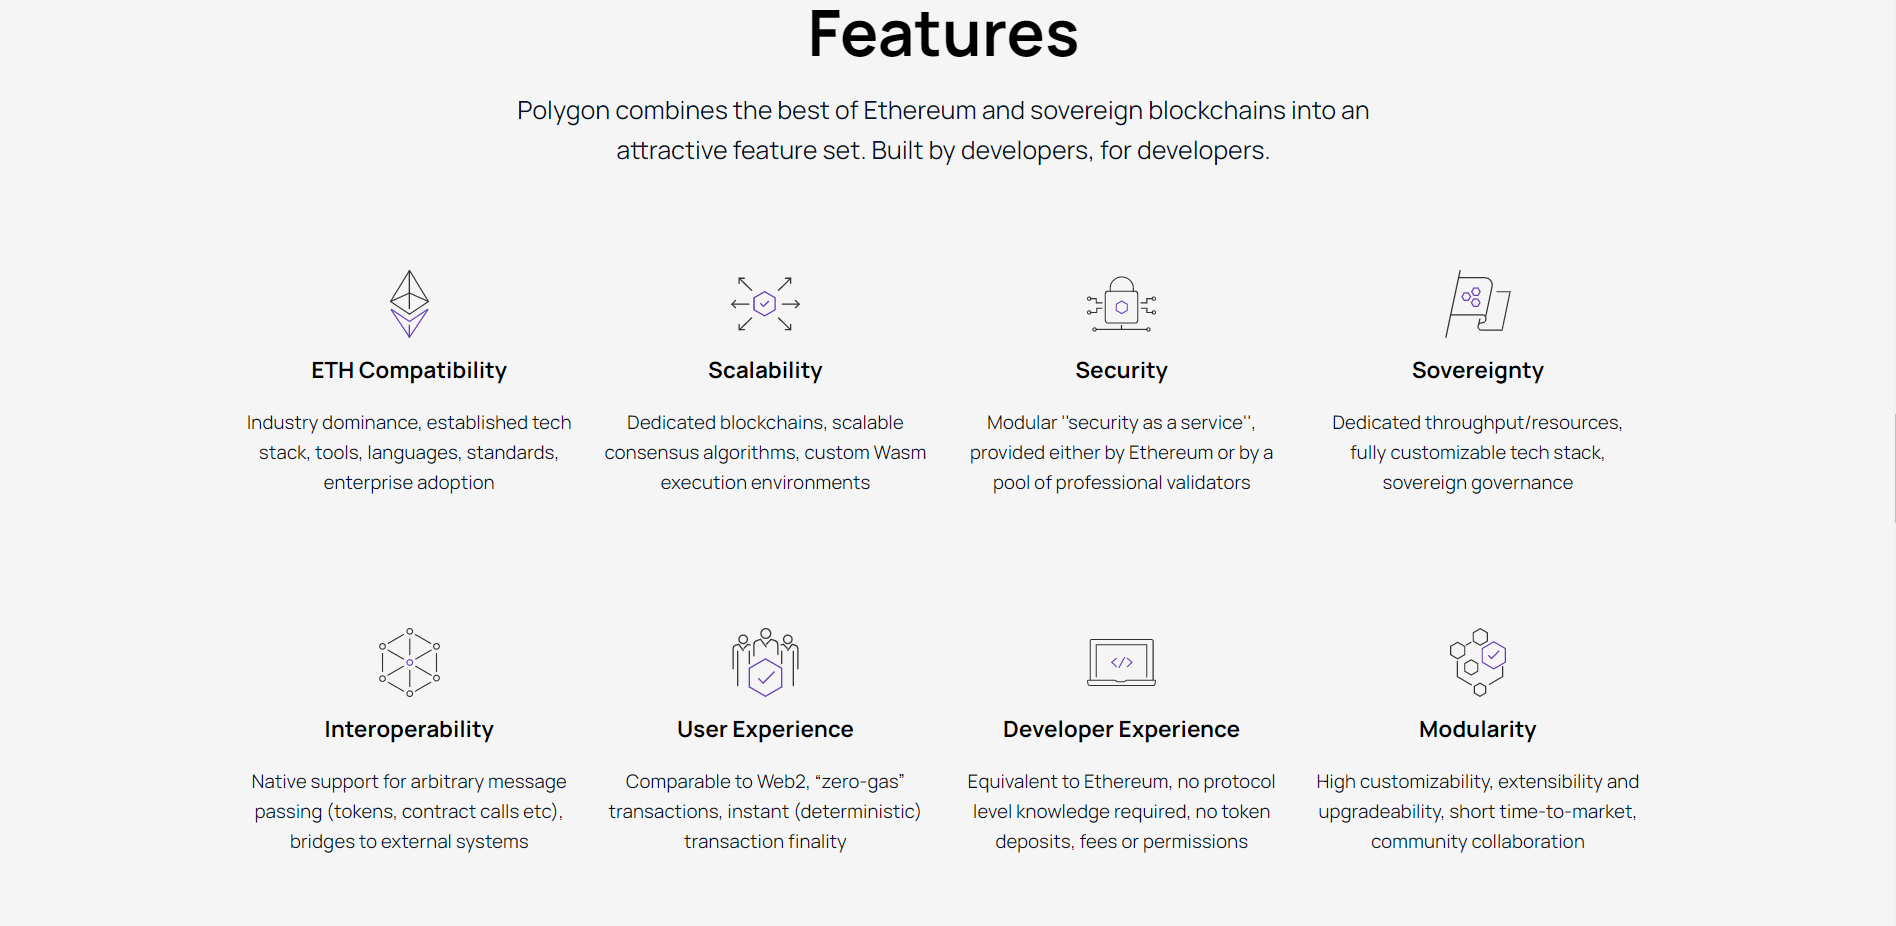

Source: https://polygon.technology/

# Import Libraries

In [1]:
!pip install pmdarima
!pip install beautifulsoup4
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
import datetime
import requests
import json
from pmdarima.utils import diff_inv
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import VAR
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.5 MB 4.6 MB/s 
     |████████████████████████████████| 115 kB 6.1 MB/s 


# Scraping Polygon (MATIC) data

In [2]:
url = 'https://api.coinmarketcap.com/data-api/v3/cryptocurrency/historical?id=3890&convertId=2781&timeStart=1592362879&timeEnd=1623898879'
matic_data = requests.get(url)
soup = BeautifulSoup(matic_data.content,"html.parser")
txt = soup.get_text()
data = json.loads(txt)
data_final = list(data.get('data').values())
data_final = data_final[3]
li = []
for i in range(len(data_final)):
    val = list(data_final[i].get('quote').values())
    li.append(val)
df = pd.DataFrame(li)
df.columns = ['open','high','low','close','volume','marketCap','date']

# Exploratory Data Analytics

In [3]:
df.head()

,open,high,low,close,volume,marketCap,date
0,0.02,0.02,0.02,0.02,16152913.21,71351278.64,2020-06-18T23:59:59.999Z
1,0.02,0.02,0.02,0.02,15884089.66,70084512.18,2020-06-19T23:59:59.999Z
2,0.02,0.02,0.02,0.02,40679422.77,78816865.30,2020-06-20T23:59:59.999Z
3,0.02,0.02,0.02,0.02,36652110.92,74613125.28,2020-06-21T23:59:59.999Z
4,0.02,0.02,0.02,0.02,28447198.30,76974526.56,2020-06-22T23:59:59.999Z


In [4]:
df.shape

(365, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       365 non-null    float64
 1   high       365 non-null    float64
 2   low        365 non-null    float64
 3   close      365 non-null    float64
 4   volume     365 non-null    float64
 5   marketCap  365 non-null    float64
 6   date       365 non-null    object 
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'],format="%Y-%d-%m %H:%M:%S",infer_datetime_format=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   open       365 non-null    float64            
 1   high       365 non-null    float64            
 2   low        365 non-null    float64            
 3   close      365 non-null    float64            
 4   volume     365 non-null    float64            
 5   marketCap  365 non-null    float64            
 6   date       365 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 20.1 KB


In [8]:
df.sort_values(by=['date'],inplace=True)

In [9]:
df.set_index(df['date'],inplace=True)

In [10]:
df.drop(['date'], axis=1, inplace=True)

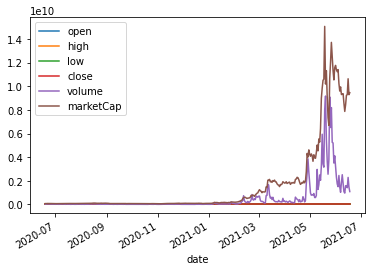

In [11]:
df.plot();

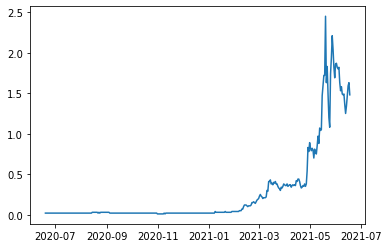

In [12]:
plt.plot(df['open']);

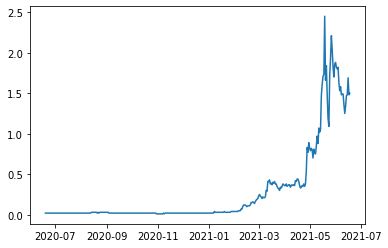

In [13]:
plt.plot(df['close']);

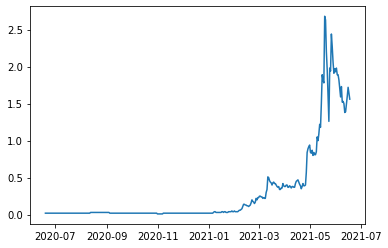

In [14]:
plt.plot(df['high']);

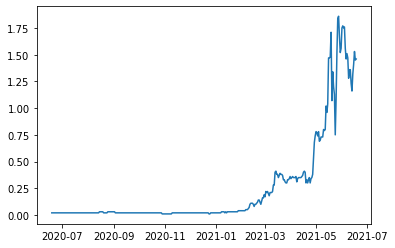

In [15]:
plt.plot(df['low']);

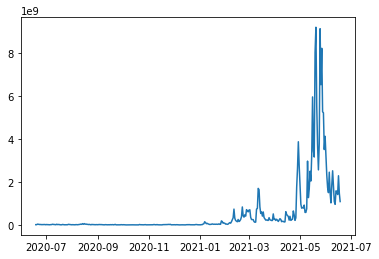

In [16]:
plt.plot(df['volume']);

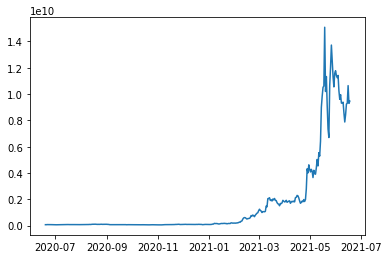

In [17]:
plt.plot(df['marketCap']);

# Stationarity check

In [18]:
adf_open = adfuller(df['open'])
adf_close = adfuller(df['close'])
adf_high = adfuller(df['high'])
adf_low = adfuller(df['low'])
adf_volume = adfuller(df['volume'])
adf_marketCap = adfuller(df['marketCap'])
print("p-value for open: {}".format(adf_open[1]))
print("p-value for close: {}".format(adf_close[1]))
print("p-value for high: {}".format(adf_high[1]))
print("p-value for low: {}".format(adf_low[1]))
print("p-value for volume: {}".format(adf_volume[1]))
print("p-value for marketCap: {}".format(adf_marketCap[1]))

p-value for open: 0.9844017934271407
p-value for close: 0.9879463897404257
p-value for high: 0.9603706746834453
p-value for low: 0.9969307254988391
p-value for volume: 0.07230590652014417
p-value for marketCap: 0.9864387214975188


# Differencing 
When building models to forecast time series data, another pre-processing step is differencing the data (calculating sequentially xt−xt−1) until we get to a point where the series is stationary. 

In [19]:
df_stationary = df.diff().dropna()

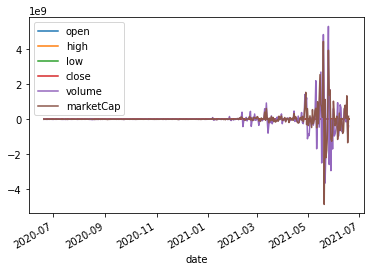

In [20]:
df_stationary.plot();

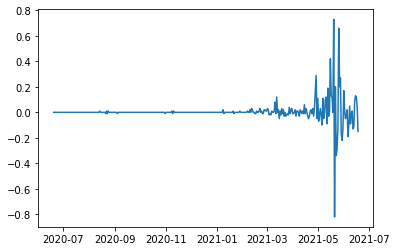

In [21]:
plt.plot(df_stationary['open']);

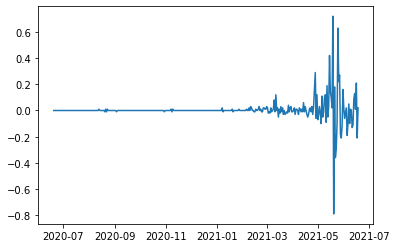

In [22]:
plt.plot(df_stationary['close']);

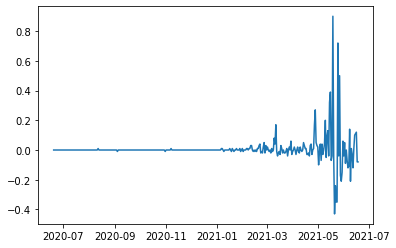

In [23]:
plt.plot(df_stationary['high']);

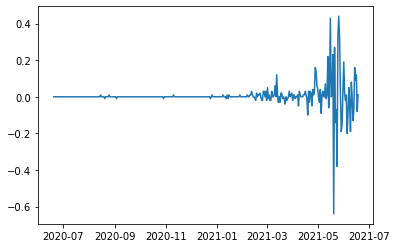

In [24]:
plt.plot(df_stationary['low']);

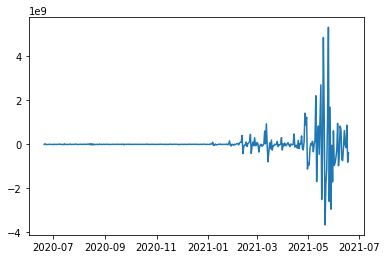

In [25]:
plt.plot(df_stationary['volume']);

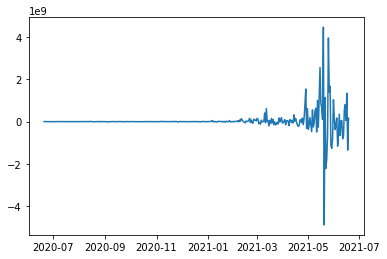

In [26]:
plt.plot(df_stationary['marketCap']);

# Price Forecasting


## VAR Model
Vector autoregression is a statistical model used to capture the relationship between multiple quantities as they change over time. VAR is a type of stochastic process model. VAR models generalize the single-variable autoregressive model by allowing for multivariate time series.
Like the autoregressive model, each variable has an equation modelling its evolution over time. This equation includes the variable's lagged (past) values, the lagged values of the other variables in the model, and an error term. VAR models do not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations. The only prior knowledge required is a list of variables which can be hypothesized to affect each other over time.
[Wikipedia](https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=Vector%20autoregression%20(VAR)%20is%20a,allowing%20for%20multivariate%20time%20series.)

In [27]:
train = df_stationary.iloc[:255]
test = df_stationary.iloc[255:]

In [28]:
train.shape

(255, 6)

In [29]:
test.shape

(109, 6)

In [30]:
forecasting_model = VAR(train)
x = forecasting_model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,25.39,25.48,1.063e+11,25.42
1,-46.09*,-45.48*,9.654e-21*,-45.84*
2,-5.512,-4.391,0.004039,-5.061
3,-4.323,-2.684,0.01328,-3.663
4,-3.006,-0.8495,0.04972,-2.137
5,-4.459,-1.785,0.01168,-3.382
6,-4.013,-0.8214,0.01835,-2.727
7,-4.199,-0.4906,0.01535,-2.705
8,-4.186,0.03982,0.01572,-2.484
9,-3.984,0.7599,0.01953,-2.073


In [31]:
results = forecasting_model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Jun, 2021
Time:                     05:36:50
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -44.7412
Nobs:                     254.000    HQIC:                  -45.0908
Log likelihood:           3635.95    FPE:                2.06612e-20
AIC:                     -45.3261    Det(Omega_mle):     1.75515e-20
--------------------------------------------------------------------
Results for equation open
                  coefficient       std. error                t-stat            prob
------------------------------------------------------------------------------------
const               -0.000000         0.000000                -1.816           0.069
L1.open             -0.000000         0.000000                -8.000           0.000
L1.high              0.000000         0.00000

In [32]:
lag_order = results.k_ar

laaged_values = train.values[-lag_order:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=109), index = test.index,columns = ['open','high','low','close','volume','marketCap'])
forecast

,open,high,low,close,volume,marketCap
date,,,,,,
2021-03-01 23:59:59.999000+00:00,0.030000,0.026021,0.035461,-0.005232,1.203635e+08,-3.142944e+07
2021-03-02 23:59:59.999000+00:00,-0.005232,-0.014476,-0.013256,0.010146,-2.195612e+08,6.675096e+07
2021-03-03 23:59:59.999000+00:00,0.010146,0.012552,0.009076,-0.005745,1.591990e+08,-4.150145e+07
2021-03-04 23:59:59.999000+00:00,-0.005745,-0.010051,-0.005097,0.004422,-1.352486e+08,3.288557e+07
2021-03-05 23:59:59.999000+00:00,0.004422,0.008272,0.003726,-0.002265,9.614944e+07,-1.909067e+07
...,...,...,...,...,...,...
2021-06-13 23:59:59.999000+00:00,0.000822,0.000887,0.000692,0.000822,2.557257e+06,4.187908e+06
2021-06-14 23:59:59.999000+00:00,0.000822,0.000887,0.000692,0.000822,2.557257e+06,4.187908e+06
2021-06-15 23:59:59.999000+00:00,0.000822,0.000887,0.000692,0.000822,2.557257e+06,4.187908e+06


In [33]:
forecast_inverse = forecast.cumsum()

# Evaluate the Forecasts

In [34]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [35]:
print('Forecast Accuracy of: open')
accuracy_prod = forecast_accuracy(forecast_inverse['open'].values, test['open'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])
    
print('Forecast Accuracy of: close')
accuracy_prod = forecast_accuracy(forecast_inverse['close'].values, test['close'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])

print('Forecast Accuracy of: high')
accuracy_prod = forecast_accuracy(forecast_inverse['high'].values, test['high'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])
    
print('Forecast Accuracy of: low')
accuracy_prod = forecast_accuracy(forecast_inverse['low'].values, test['low'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])

print('Forecast Accuracy of: volume')
accuracy_prod = forecast_accuracy(forecast_inverse['volume'].values, test['volume'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])
    
print('Forecast Accuracy of: marketCap')
accuracy_prod = forecast_accuracy(forecast_inverse['marketCap'].values, test['marketCap'])
for key in accuracy_prod:
    print(key, ' : ', accuracy_prod[key])
    

Forecast Accuracy of: open
mape  :  inf
me  :  0.06103078815062737
mae  :  0.11049739658236693
mpe  :  inf
rmse  :  0.17211052319479025
corr  :  0.001758836710041211
minmax  :  1.2006262726965111
Forecast Accuracy of: close
mape  :  inf
me  :  0.03192951267883104
mae  :  0.09574577584290393
mpe  :  inf
rmse  :  0.162877020131308
corr  :  0.004412386113930464
minmax  :  1.4881447989808685
Forecast Accuracy of: high
mape  :  inf
me  :  0.05129285144662431
mae  :  0.10969064356317275
mpe  :  inf
rmse  :  0.17190269737769165
corr  :  -0.005159257683334315
minmax  :  1.274969319134256
Forecast Accuracy of: low
mape  :  inf
me  :  0.051300258075914464
mae  :  0.09095956495653684
mpe  :  inf
rmse  :  0.13729038452597886
corr  :  0.01901245731548698
minmax  :  1.1605686160959845
Forecast Accuracy of: volume
mape  :  6.2006992152763765
me  :  110266178.990089
mae  :  647314562.3227189
mpe  :  2.7536349890570286
rmse  :  1130982372.5629303
corr  :  -0.016331712178946765
minmax  :  3.316300298912